In [17]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA

In [2]:
warnings.filterwarnings('ignore')

## Plot functions

In [16]:
def draw_corr_mat(df):
    plt.figure(figsize=(12,10))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

In [50]:
def draw_corr_mat(df):
    plt.figure(figsize=(8, 8))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

## 1. Exploratory data analysis

In [4]:
df_x = pd.read_excel('data/X_4_12.xlsx', 
                   header=None)
df_y = pd.read_excel('data/Y_4_12.xlsx', 
                   header=None)

### X_4_12 data

In [5]:
df_x.head()

,0,1,2,3
0,0.713168,-1.155396,4.892525,-4.179356
1,0.180207,-0.951694,3.215496,-3.035290
2,-0.160125,-1.056572,2.849464,-3.009590
3,0.135208,-0.901885,2.976070,-2.840862
4,0.951132,-0.891886,4.577923,-3.626791


In [8]:
df_x.describe()

,0,1,2,3
count,200.000000,200.000000,200.000000,200.000000
mean,-1.041891,-1.023640,0.987137,-2.029028
std,2.724895,1.204667,2.710166,1.666720
min,-5.872689,-3.080677,-3.682738,-5.035222
25%,-3.138779,-1.932904,-1.184310,-3.369372
50%,-0.982649,-0.999337,0.944718,-2.040614
75%,1.035388,-0.066414,3.198369,-0.703692
max,3.930430,1.179921,5.905926,1.051648


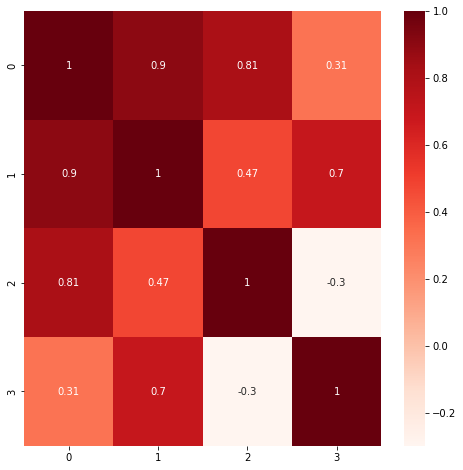

In [51]:
draw_corr_mat(df_x)

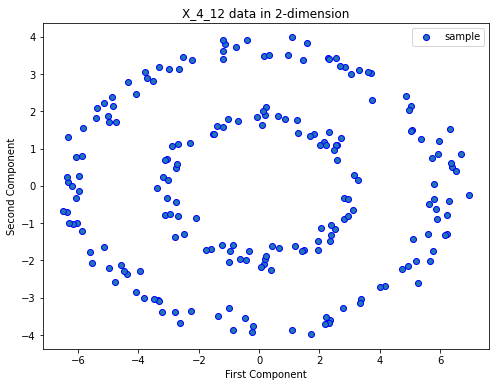

In [54]:
pca_x = PCA(n_components=2)
pca_x.fit(df_x)
res_pca_x = np.array(pca_x.transform(df_x))
plt.figure(figsize=(8, 6))
plt.scatter(res_pca_x[:, 0], res_pca_x[:, 1], label='sample', edgecolors='blue')
plt.legend()
plt.ylabel('Second Component')
plt.xlabel('First Component')
plt.title('X_4_12 data in 2-dimension')
plt.show()

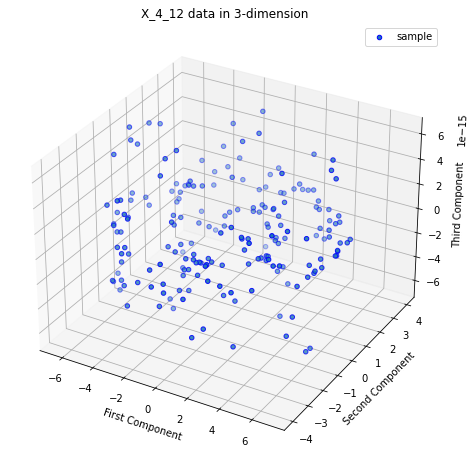

In [43]:
pca_x = PCA(n_components=3)
pca_x.fit(df_x)
res_pca_x = np.array(pca_x.transform(df_x))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(res_pca_x[:, 0], res_pca_x[:, 1], res_pca_x[:, 2], label='sample', edgecolors='blue')
plt.legend()
ax.set_ylabel('Second Component')
ax.set_xlabel('First Component')
ax.set_zlabel('Third Component')
plt.title('X_4_12 data in 3-dimension')
plt.show()

### Y_4_12 data

In [6]:
df_y.head()

,0,1,2,3
0,0.949997,-0.178492,-0.129891,1.067448
1,1.182598,0.124944,0.179682,1.080319
2,1.986758,0.917291,1.891755,0.942933
3,1.159683,1.187749,0.775773,1.105749
4,1.981371,0.926145,2.165250,1.282681


In [9]:
df_y.describe()

,0,1,2,3
count,200.000000,200.000000,200.000000,200.000000
mean,1.331577,0.647711,0.974792,0.991910
std,0.491012,0.504300,0.866040,0.165052
min,0.651068,-0.592140,-0.355696,0.435252
25%,0.951138,0.147654,0.068272,0.911239
50%,1.097644,0.908226,0.975041,1.002791
75%,1.899907,1.033586,1.881851,1.090635
max,2.203044,1.363924,2.427703,1.433292


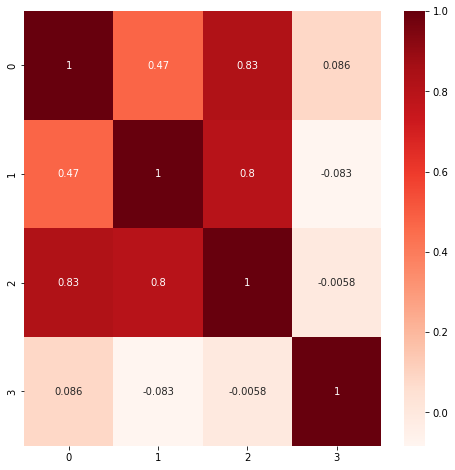

In [52]:
draw_corr_mat(df_y)

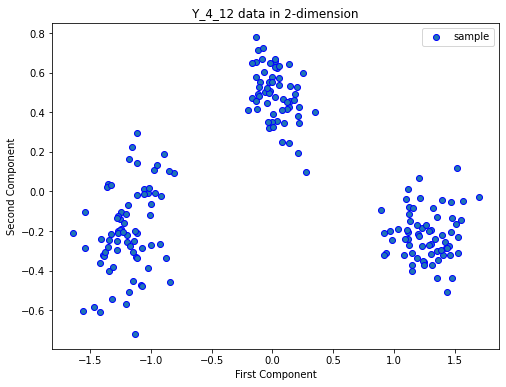

In [44]:
pca_y = PCA(n_components=2)
pca_y.fit(df_y)
res_pca_y = np.array(pca_y.transform(df_y))
plt.figure(figsize=(8, 6))
plt.scatter(res_pca_y[:, 0], res_pca_y[:, 1], label='sample', edgecolors='blue')
plt.legend()
plt.ylabel('Second Component')
plt.xlabel('First Component')
plt.title('Y_4_12 data in 2-dimension')
plt.show()

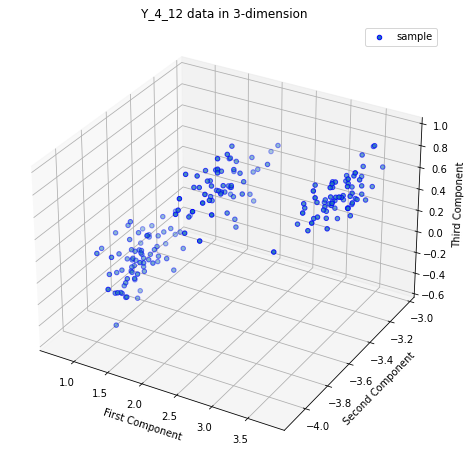

In [45]:
pca_y = PCA(n_components=3)
pca_y.fit(df_y)
res_pca_y = np.array(pca_x.transform(df_y))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(res_pca_y[:, 0], res_pca_y[:, 1], res_pca_y[:, 2], label='sample', edgecolors='blue')
plt.legend()
ax.set_ylabel('Second Component')
ax.set_xlabel('First Component')
ax.set_zlabel('Third Component')
plt.title('Y_4_12 data in 3-dimension')
plt.show()